### Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os


## read dataset

In [2]:
df = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## Exploratory Data Analysis

In [3]:
df.set_index('Invoice ID', inplace=True)


In [4]:
df.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Invoice ID,,,,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2


In [5]:
df.shape

(1000, 16)

 ### so i split data to seperate branches to evaluate branches and select best branches to analysis it

In [6]:
g=df.groupby('Branch')
g

In [7]:
for branch,data in g:
    print('branch name :', branch)
    print('--------------------------')
    print('data:',data)

branch name : A
--------------------------
data:             Branch    City Customer type  Gender            Product line  \
Invoice ID                                                                 
750-67-8428      A  Yangon        Member  Female       Health and beauty   
631-41-3108      A  Yangon        Normal    Male      Home and lifestyle   
123-19-1176      A  Yangon        Member    Male       Health and beauty   
373-73-7910      A  Yangon        Normal    Male       Sports and travel   
355-53-5943      A  Yangon        Member  Female  Electronic accessories   
...            ...     ...           ...     ...                     ...   
886-18-2897      A  Yangon        Normal  Female      Food and beverages   
745-74-0715      A  Yangon        Normal    Male  Electronic accessories   
727-02-1313      A  Yangon        Member    Male      Food and beverages   
347-56-2442      A  Yangon        Normal    Male      Home and lifestyle   
849-09-3807      A  Yangon        Membe

In [8]:
g1=df.groupby('Branch')[['gross income']].mean().reset_index()
g1

,Branch,gross income
0,A,14.874001
1,B,15.232024
2,C,16.052367


In [9]:
g1=df.groupby('Branch')[['Rating']].mean().reset_index()
g1

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


### so the branch c is the most branch have a high gross income and high rating so we select this branch to analysis it

### create dataframe to branch c

In [10]:
x=g.get_group('C')

In [11]:
branch_C=pd.DataFrame(x)

In [12]:
branch_C.describe()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866
std,27.179799,3.021724,12.531470,263.160870,250.629400,0.000000,12.531470,1.704526
min,10.160000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,33.767500,3.000000,5.784500,121.474500,115.690000,4.761905,5.784500,5.600000
50%,56.810000,6.000000,12.924750,271.419750,258.495000,4.761905,12.924750,7.100000
75%,81.552500,8.000000,23.607375,495.754875,472.147500,4.761905,23.607375,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000


### analysis branch c

In [13]:
Customer_type=branch_C.groupby('Customer type')[['gross income']].mean().reset_index()

In [14]:
Customer_type

,Customer type,gross income
0,Member,16.027411
1,Normal,16.078893


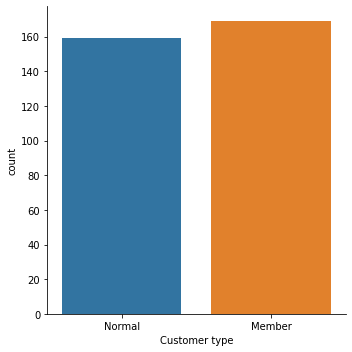

In [15]:
sns.catplot(x='Customer type',kind='count',data=branch_C)

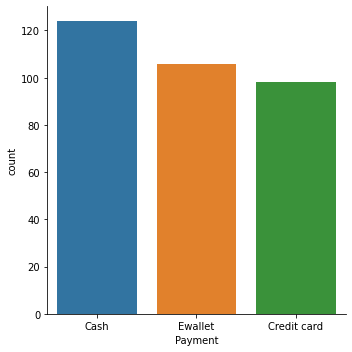

In [16]:
sns.catplot(x='Payment',kind='count',data=branch_C)

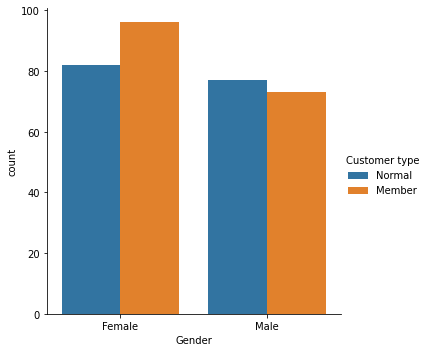

In [17]:
sns.catplot(x='Gender',hue='Customer type',kind='count',data=branch_C)

In [18]:
Products=branch_C.groupby('Product line')[['gross income']].mean().reset_index()
Products

,Product line,gross income
0,Electronic accessories,16.423355
1,Fashion accessories,15.794923
2,Food and beverages,17.147803
3,Health and beauty,15.215500
4,Home and lifestyle,14.704289
5,Sports and travel,16.679289


### modeling the data to find most factor that affect to gross income

In [19]:
x=branch_C[['Unit price','Quantity','Total','Rating','cogs','Tax 5%']]
y=branch_C[['gross income']]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross income   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.055e+32
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        04:21:55   Log-Likelihood:                 10078.
No. Observations:                 328   AIC:                        -2.015e+04
Df Residuals:                     323   BIC:                        -2.013e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.155e-14   3.81e-15     -3.031      0.003    -1.9e-14   -4.05e-15
Unit price  5.898e-17   4.66e-17      1.266      0.207   -3.27e-17    1.51e-16
Quantity    5.551e-16   4.76e-16      1.166      0.244   -3.81e-16    1.49e-15
Total          0.0249   3.71e-18   6.72e+15      0.000       0.025       0.025
Rating       2.22e-16   3.59e-16      0.619      0.536   -4.83e-16    9.27e-16
cogs           0.0238   3.53e-18   6.72e+15      0.000       0.024       0.024
Tax 5%         0.0012   1.77e-19   6.72e+15      0.000       0.001       0.001
==============================================================================
Omnibus:                       25.835   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.515
Skew:                          -0.744   Prob(JB):                     2.36e-07
Kurtosis:                       2.856   Cond. No.                     7.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.26e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
x= pd.get_dummies(branch_C[['Customer type']])
y=branch_C[['gross income']]
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gross income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.001378
Date:                Tue, 28 Jun 2022   Prob (F-statistic):              0.970
Time:                        04:21:55   Log-Likelihood:                -1294.2
No. Observations:                 328   AIC:                             2592.
Df Residuals:                     326   BIC:                             2600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.7021      0.462     23.154      0.000       9.793      11.611
Customer type_Member     5.3253      0.724      7.354      0.000       3.901       6.750
Customer type_Normal     5.3768      0.737      7.291      0.000       3.926       6.828
==============================================================================
Omnibus:                       32.455   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.215
Skew:                           0.852   Prob(JB):                     1.85e-09
Kurtosis:                       2.808   Cond. No.                     1.60e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
branch_C.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.061527,0.637761,0.637761,0.637761,NaN,0.637761,0.000760
Quantity,0.061527,1.000000,0.735060,0.735060,0.735060,NaN,0.735060,-0.033319
Tax 5%,0.637761,0.735060,1.000000,1.000000,1.000000,NaN,1.000000,-0.039253
Total,0.637761,0.735060,1.000000,1.000000,1.000000,NaN,1.000000,-0.039253
cogs,0.637761,0.735060,1.000000,1.000000,1.000000,NaN,1.000000,-0.039253
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.637761,0.735060,1.000000,1.000000,1.000000,NaN,1.000000,-0.039253
Rating,0.000760,-0.033319,-0.039253,-0.039253,-0.039253,NaN,-0.039253,1.000000


In [22]:
branch_C.drop('gross margin percentage', axis=1, inplace=True)


In [23]:
branch_C.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.061527,0.637761,0.637761,0.637761,0.637761,0.000760
Quantity,0.061527,1.000000,0.735060,0.735060,0.735060,0.735060,-0.033319
Tax 5%,0.637761,0.735060,1.000000,1.000000,1.000000,1.000000,-0.039253
Total,0.637761,0.735060,1.000000,1.000000,1.000000,1.000000,-0.039253
cogs,0.637761,0.735060,1.000000,1.000000,1.000000,1.000000,-0.039253
gross income,0.637761,0.735060,1.000000,1.000000,1.000000,1.000000,-0.039253
Rating,0.000760,-0.033319,-0.039253,-0.039253,-0.039253,-0.039253,1.000000


<AxesSubplot:>

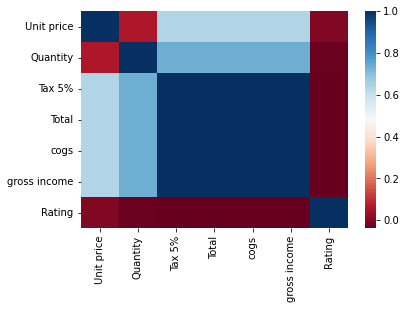

In [24]:
sns.heatmap(branch_C.corr(),cmap='RdBu')

### so branch c has a high gross income because
1- high rating 
2- member more than normal
3- the most income comes from Food and beverages	
4- most payment method used is cash

### so the other branches most focus  on the factor that make branch c successful